## Data Augmentationm

### torchvision.transforms

In [15]:
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from torch import optim 
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2
import utils
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [21]:
# dataset
train_dataset = CIFAR10(root='/cifar10_data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [20]:
im, label = train_dataset[0]

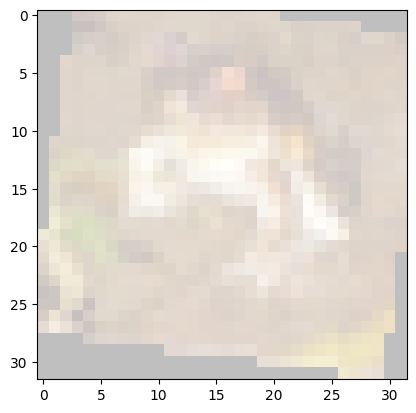

In [17]:
# imを0~1に変換して可視化
im = im / 2 + 0.5
im.shape
plt.imshow(im.permute(1, 2, 0))

In [32]:
X, y = next(iter(train_loader))
X.shape

torch.Size([4, 3, 32, 32])

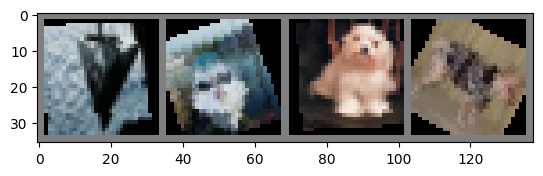

In [33]:
# Xを描画する
X = make_grid(X).permute(1, 2, 0)
# print(X.min(), X.max())
X = X / 2 + 0.5
plt.imshow(X)



## Albumentations

In [2]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

In [3]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.PadIfNeeded(min_height=40, min_width=40, border_mode=cv2.BORDER_CONSTANT), # 指定したサイズになるようpadding追加
    A.RandomCrop(height=32, width=32),
    A.Rotate(limit=30, border_mode=cv2.BORDER_CONSTANT),
    A.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ToTensorV2(),
])

In [4]:
class AlbumentationsTransform:
    def __init__(self, transform):
        self.transform = transform

    def __call__(self, image,target=None):
        image = self.transform(image=np.array(image))['image']
        if target is not None:
            return image, target
        else:
            return image

In [5]:
transform = AlbumentationsTransform(transform)

In [6]:
# dataset
train_dataset = CIFAR10(root='/cifar10_data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


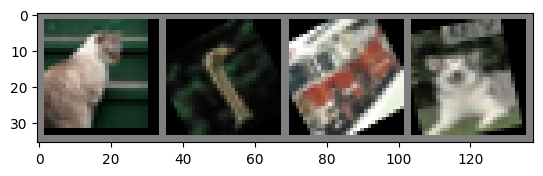

In [7]:
X, y = next(iter(train_loader))
X = make_grid(X).permute(1, 2, 0)
X = X / 2 + 0.5
plt.imshow(X)

## Data Augmentaitonを使って学習

In [11]:
# transform 

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
# dataset
train_dataset = CIFAR10(root='/cifar10_data', train=True, download=True, transform=train_transform)
val_dataset = CIFAR10(root='/cifar10_data', train=False, download=True, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [16]:
# model
conv_model = utils.get_conv_model(in_ch = 3, )
# optimizer
opt = optim.Adam(conv_model.parameters(), lr=0.03)
train_losses, val_lossees, val_accuracy = utils.learn(conv_model, train_loader, val_loader ,opt, F.cross_entropy, 5)

epoch: 0: train error: 1.7613325289753088, validation error: 1.685634892198104, validation accuracy: 0.3791534810126582


epoch: 1: train error: 1.5842645765875307, validation error: 1.6270323569261576, validation accuracy: 0.4375988924050633


epoch: 2: train error: 1.540207638155164, validation error: 1.4551598739020433, validation accuracy: 0.47043117088607594


epoch: 3: train error: 1.5121663985654825, validation error: 1.5958568868757803, validation accuracy: 0.43344541139240506


epoch: 4: train error: 1.4895668298082279, validation error: 1.3878453245645836, validation accuracy: 0.5079113924050633
